**Project 1: the Penguins**

**2.1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [2]:
#Note to other users: you may change the file path to suit your needs
penguin_data = pd.read_csv("datasets/penguins_size.csv")

penguin_data.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


**Tree of depth 1**

**Clean dataset by dropping NA**

In [3]:
penguin_clean = penguin_data.dropna(subset=['culmen_length_mm', 'culmen_depth_mm', 'species'])

**Turn Culmen Length and Depth into x values and Species into y values**

In [4]:
X = penguin_clean[['culmen_length_mm', 'culmen_depth_mm']]
y = penguin_clean['species']

**Turn categorical variable (Species) into numerical values**


In [5]:
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y)

**Train dataset and split the test size in 0.2, training into 0.8 and put random state 42 so that it gives the same split**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

**Train a tree of depth 1**

In [7]:
classifier1 = DecisionTreeClassifier(max_depth=1)
classifier1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

**Accuracy of model**

In [8]:
y_train = classifier1.predict(X_test)

#Calculate accuracy
accuracy = accuracy_score(y_test, y_train)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.74


**Decision tree of Classifier 1**

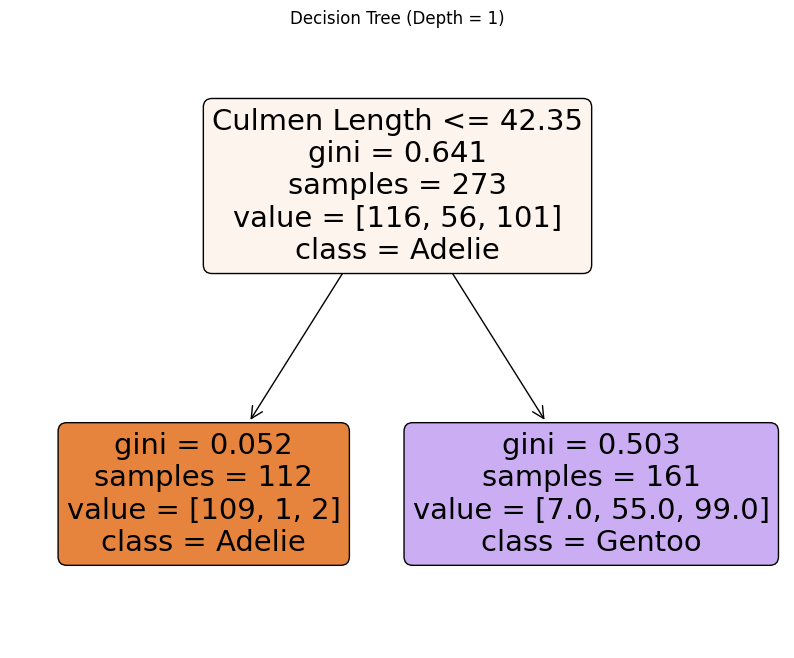

In [9]:
plt.figure(figsize=(10,8))
plot_tree(classifier1, filled=True, feature_names=['Culmen Length', 'Culmen Depth'], class_names=le.classes_, rounded=True)
plt.title("Decision Tree (Depth = 1)")
plt.show()

**Scatterplot for Classifier 1**

c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


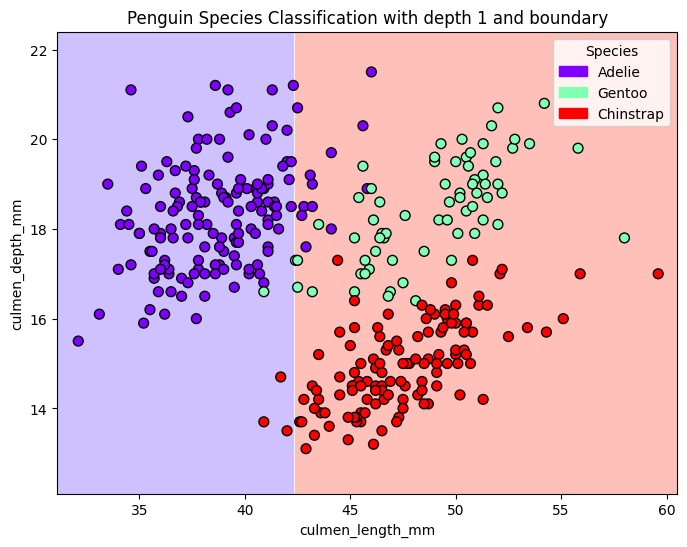

In [10]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8,6))

x_min, x_max = X['culmen_length_mm'].min() - 1, X['culmen_length_mm'].max() + 1
y_min, y_max = X['culmen_depth_mm'].min() - 1, X['culmen_depth_mm'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = classifier1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='rainbow')

#Scatterplot of the penguins data
scatter = plt.scatter(X['culmen_length_mm'], X['culmen_depth_mm'], c=y_encoded, cmap='rainbow', edgecolor='k', s=50)

plt.xlabel('culmen_length_mm')
plt.ylabel('culmen_depth_mm')

#legend for species
legend_labels = ['Adelie', 'Gentoo', 'Chinstrap']
species_colors = [scatter.cmap(i/2) for i in range(3)]
patches = [mpatches.Patch(color=species_colors[i], label=legend_labels[i]) for i in range(3)]

plt.legend(handles=patches, title="Species")

plt.title("Penguin Species Classification with depth 1 and boundary")
plt.show()

**Graph summary**

The purple zone corresponds to the Adelie penguin species. It has the lowest gini index which makes sense as it is mostly in the boundary

The red zone corresponds to the Gentoo penguin species which has a lower gini index as the model predicts it less well and additionally mistakes chinstrap for the gentoo species making it a very bad model

**Decision tree of depth 2**

In [11]:
#Features and target
X = penguin_clean[['culmen_length_mm', 'culmen_depth_mm']]
y = penguin_clean['species']

le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#Decision tree with depth 2
classifier2 = DecisionTreeClassifier(max_depth=2)
classifier2.fit(X_train, y_train)

#culmen length = 35 mm, culmen depth = 17 mm)
new_sample = np.array([[35, 17]])  

**Accuracy of classifer with depth 2**

In [12]:
#Calculate model accuracy on the test set
y_pred = classifier2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.93


**Decision tree of depth 2**

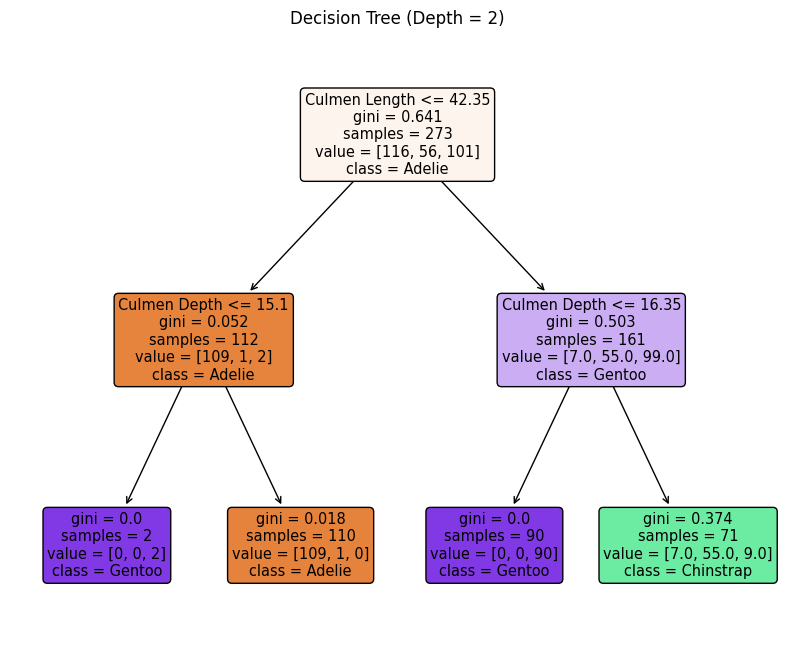

In [13]:
#Plot the decision tree
plt.figure(figsize=(10,8))
plot_tree(classifier2, filled=True, feature_names=['Culmen Length', 'Culmen Depth'], class_names=le.classes_, rounded=True)
plt.title("Decision Tree (Depth = 2)")
plt.show()

**Scatterplot of classification of depth 2 with boundary**

c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


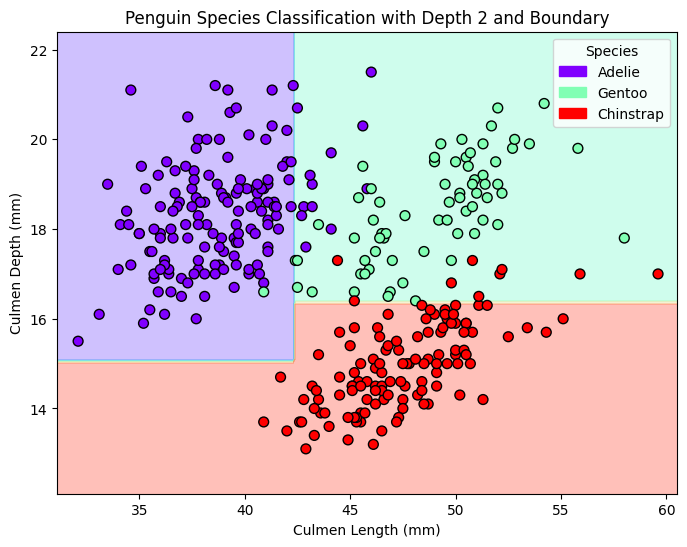

In [14]:
plt.figure(figsize=(8,6))

#Create a grid of points to represent the whole feature space
x_min, x_max = X['culmen_length_mm'].min() - 1, X['culmen_length_mm'].max() + 1
y_min, y_max = X['culmen_depth_mm'].min() - 1, X['culmen_depth_mm'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

#Classify each point on the grid
Z = classifier2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Define the color zones based on classification
plt.contourf(xx, yy, Z, alpha=0.3, cmap='rainbow')

scatter = plt.scatter(X['culmen_length_mm'], X['culmen_depth_mm'], c=y_encoded, cmap='rainbow', edgecolor='k', s=50)

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')

legend_labels = ['Adelie', 'Gentoo', 'Chinstrap']
species_colors = [scatter.cmap(i/2) for i in range(3)]
patches = [mpatches.Patch(color=species_colors[i], label=legend_labels[i]) for i in range(3)]

plt.legend(handles=patches, title="Species")

plt.title("Penguin Species Classification with Depth 2 and Boundary")
plt.show()

**Bar plot of probability belonging to penguin class**

c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


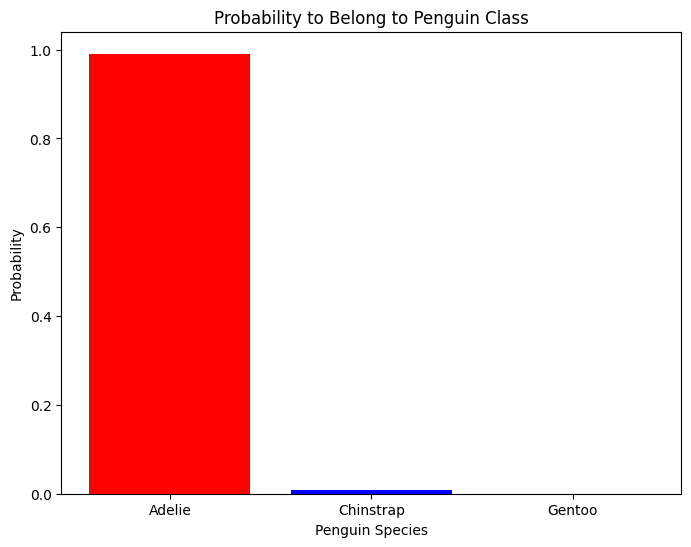

In [15]:
new_sample = np.array([[35, 17]])

probabilities = classifier2.predict_proba(new_sample)

species_names = le.classes_
probabilities_for_plotting = probabilities[0]

plt.figure(figsize=(8,6))
plt.bar(species_names, probabilities_for_plotting, color=['red', 'blue', 'green'])

plt.xlabel('Penguin Species')
plt.ylabel('Probability')
plt.title('Probability to Belong to Penguin Class')

plt.show()

***Project 2: Breast Cancer - I will be doing some basic machine learning then applying more complex techniques further along***

**3.1 Hold Out Method**

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [17]:
#Note to other users: you may change the path to suit your needs
Breastcancer_data = pd.read_csv("datasets/breastcancer.csv")

Breastcancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


**Clean data**

In [18]:
Breastcancer_data = Breastcancer_data.drop(columns=['Unnamed: 32'])
Breastcancer_data = Breastcancer_data.dropna()

In [19]:
Breastcancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
X = Breastcancer_data[['radius_mean', 'concave points_mean']] 
y = Breastcancer_data['diagnosis']

In [21]:
y_encoded = preprocessing.LabelEncoder().fit_transform(y)

**Training the data with test size set to 20% and 80% set to training data**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1)

**Decision tree classifier with depth of 6**

In [23]:
dt = DecisionTreeClassifier(max_depth=6, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

**First five value prediction**

In [24]:
#predictions on the test set and display results for the first 5 values
y_pred = dt.predict(X_test)
firstfive_pred = y_pred[:5]
firstfive_pred

array([1, 0, 0, 1, 0])

**Decision tree for tumor classification for breast cancer**

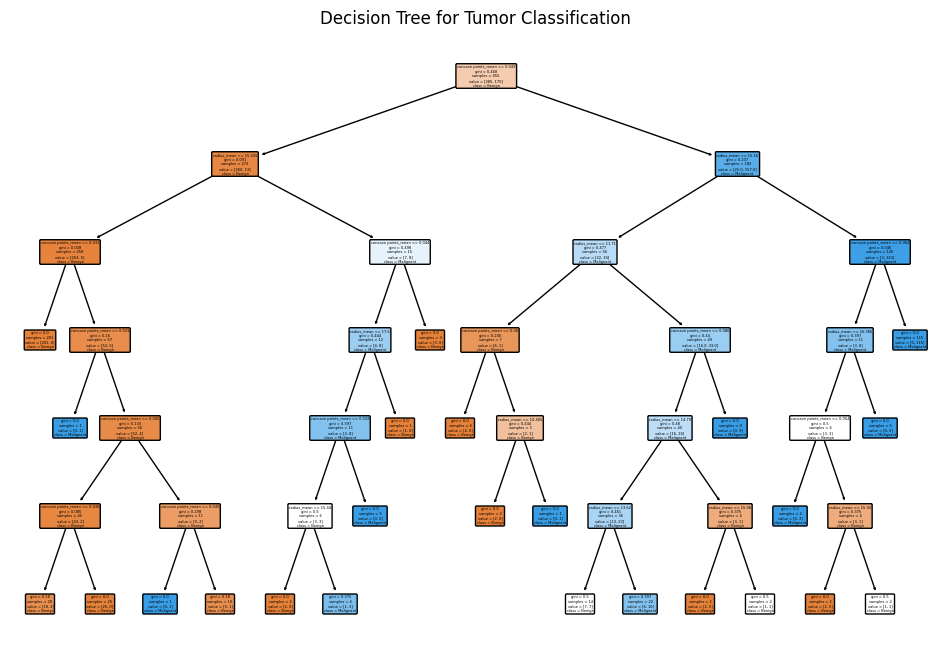

In [25]:
plt.figure(figsize=(12,8))
plot_tree(dt, filled=True, feature_names=['radius_mean', 'concave points_mean'], class_names=['Benign', 'Malignant'], rounded=True)
plt.title("Decision Tree for Tumor Classification")
plt.show()

**First five predicted values along with their actual values**

In [26]:
#Display the first five predictions alongside their actual values
firstfive = pd.DataFrame({
    'Predicted': firstfive_pred,
    'Actual': y_test[:5]  
})
firstfive


,Predicted,Actual
0,1,0
1,0,1
2,0,0
3,1,1
4,0,1


**1. Missing Data:**
Some rows in the dataset may have missing values in critical features. Missing data can still cause problems during model training and can lead to biased results if not handled properly.

**2. Class imbalance:** If the number of benign tumors (B) is much higher than malignant tumors (M) (or vice versa), the model may learn to predict the majority class and achieve a high accuracy without truly being effective at predicting the minority class. This is because an imbalanced class distributions can lead to biased predictions. 

**3. Feature Scaling:** The features in the dataset (such as radius_mean, concave points_mean) have different scales and ranges, which can affect the performance of certain models (especially models like kNN or gradient algorithms).

**3.2 Choosing the Information Criterion**

**1. Import accuracy score from sklearn.metrics**

In [27]:

from sklearn.metrics import accuracy_score

**2. Name the prediction made from X test as y pred**

In [28]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


**3. Accuracy score of the Random Forest**

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

Random Forest Accuracy: 0.89


**4. Build two trees, one using entropy and other using Gini Index**

In [30]:
#entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)
dt_entropy.fit(X_train, y_train)

#Gini index
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Display entropy criterion with accuracy score**

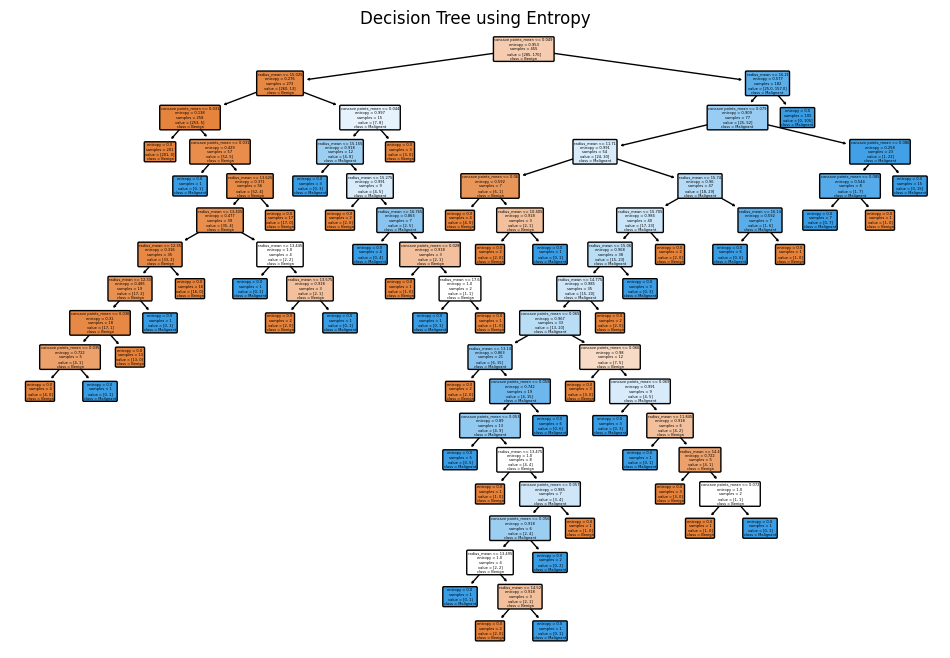

Accuracy of the Decision Tree with Entropy: 0.90


In [31]:
#Plot using entropy criterion
plt.figure(figsize=(12,8))
plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'], rounded=True)
plt.title("Decision Tree using Entropy")
plt.show()

#Predict entropy on test set
y_pred_entropy = dt_entropy.predict(X_test)

#Calculate accuracy for entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print(f"Accuracy of the Decision Tree with Entropy: {accuracy_entropy:.2f}")



**Display tree using Gini Index criterion with accuracy score**

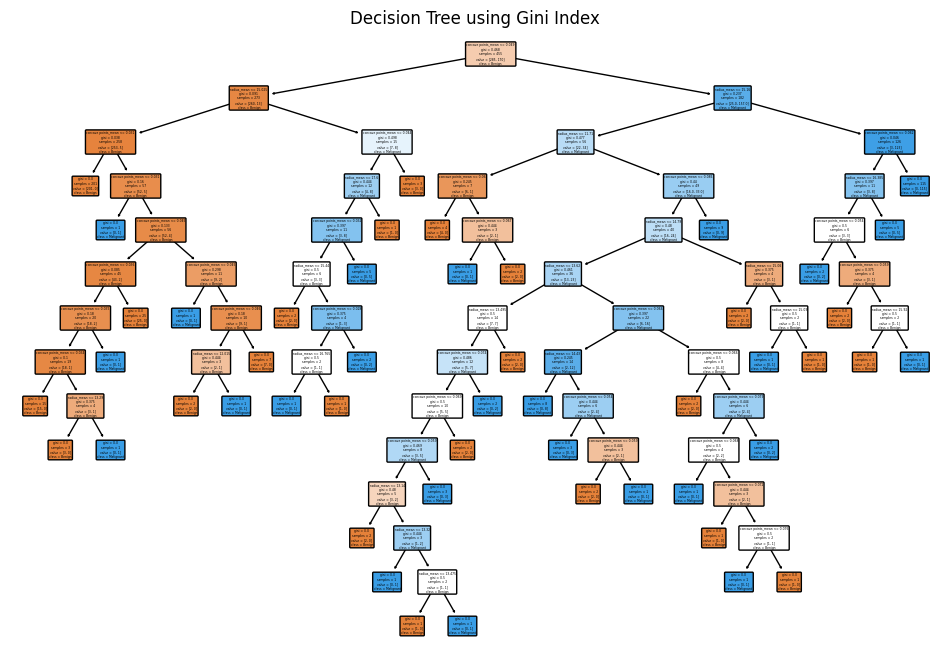

Accuracy of the Decision Tree with Gini Index: 0.87


In [32]:
#Plot using Gini index criterion
plt.figure(figsize=(12,8))
plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'], rounded=True)
plt.title("Decision Tree using Gini Index")
plt.show()

#predict gini index on test set
y_pred_gini = dt_gini.predict(X_test)

#Calculate accuracy for gini index
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print(f"Accuracy of the Decision Tree with Gini Index: {accuracy_gini:.2f}")

Overall we can see that the decision tree using the entropy criterion has a higher accuracy score of 0.90 compared to the accuracy of the decision tree using the gini index criterion with 0.87 which is a 0.03 difference and thus tells us that the entropy decision tree has a higher accuracy

**3.3: Performance Metrics and Grid Search**

In [33]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

rf_pred = rf.predict(X_test)
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

We will now explore new performance metrics for two models : a random forest and a kNN. Based on
the previous data, calculate the following metrics after specifying their meanings, formulas, advantages,
and disadvantages:


**1. Accuracy**

Meaning: Accuracy is the proportion of correctly predicted instances among the total instances. It gives the overall performance of the model.

Formula: Accuracy = (True Positives + True Negatives)/Total Instances
​
 
Advantages:
            Simple to understand and compute.

Disadvantages:
            Accuracy can be misleading, especially with imbalanced datasets, where a model might predict the majority class for all samples, achieving high accuracy but poor performance.

In [34]:
#Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

print(f"Random Forest - Accuracy: {rf_accuracy:.2f}")
print(f"kNN - Accuracy: {knn_accuracy:.2f}")

Random Forest - Accuracy: 0.89
kNN - Accuracy: 0.83


**2. Recall**

Meaning: Recall is the proportion of actual positive instances (malignant tumors) that are correctly identified by the model.

Formula: Recall= True Positives / (True Positives + False Negatives)

Advantages: Measures the ability of the model to correctly identify positive instances.

Disadvantages: Focusing only on recall may lead to a high number of false positives, especially in cases where the model predicts most samples as positive.

In [35]:
#Calculate recall (Sensitivity)
rf_recall = recall_score(y_test, rf_pred)
knn_recall = recall_score(y_test, knn_pred)

print(f"Random forest - Recall: {rf_recall:.2f}")
print(f"kNN - Recall: {knn_recall:.2f}")

Random forest - Recall: 0.79
kNN - Recall: 0.64


**3. Precision**

Meaning: Precision is the proportion of positive predictions that are actually correct. It measures the accuracy of the positive predictions.

Formula: Precision= True Positives / (True Positives + False Positives)

Advantages: Precision helps avoid false positives, which is crucial in situations where false positives are costly (for example: medical diagnosis).

Disadvantages: High precision can be achieved by predicting fewer positives, which may lead to a high number of false negatives.

In [36]:
#Calculate precision
rf_precision = precision_score(y_test, rf_pred)
knn_precision = precision_score(y_test, knn_pred)

print(f"Random forest - Precision: {rf_precision:.2f}")
print(f"kNN - Precision: {knn_precision:.2f}")

Random forest - Precision: 0.92
kNN - Precision: 0.87


**4. Sensitivity**

Sensitivity is just another term for Recall and represents the same metric. So, the formula and explanation are identical to recall.

**5. Specificity (True Negative Rate)** 

Meaning: Specificity is the proportion of actual negative instances (benign tumors) that are correctly identified by the model.

Formula: Specificity= True Negatives / (True Negatives + False Positives)

Advantages: Helps in identifying how well the model avoids false positives.

Disadvantages: High specificity might lead to missed positive cases, as the model might classify too many instances as negative.

In [37]:
rf_cm = confusion_matrix(y_test, rf_pred)
knn_cm = confusion_matrix(y_test, knn_pred)

In [38]:
rf_specificity = rf_cm[0, 0] / (rf_cm[0, 0] + rf_cm[0, 1])
knn_specificity = knn_cm[0, 0] / (knn_cm[0, 0] + knn_cm[0, 1])

print(f"Random forest - Specificity: {rf_specificity:.2f}")
print(f"kNN - Specificity: {knn_specificity:.2f}")

Random forest - Specificity: 0.96
kNN - Specificity: 0.94


**6. F1-Score**

Meaning: The F1-Score is the harmonic mean of Precision and Recall. It balances the two metrics, especially when we have imbalanced datasets.

Formula: F1-Score = 2 × (Precision × Recall)/ (Precision + Recall)

Advantages: It balances Precision and Recall, making it useful in imbalanced datasets where you care about both false positives and false negatives.

Disadvantages: It might not be useful if Precision or Recall alone is significantly more important than the other in a given context.

In [39]:
# Calculate F1-score
rf_f1 = f1_score(y_test, rf_pred)
knn_f1 = f1_score(y_test, knn_pred)

print(f"Random forest - F1-Score: {rf_f1:.2f}")
print(f"kNN - F1-Score: {knn_f1:.2f}")

Random forest - F1-Score: 0.85
kNN - F1-Score: 0.74


**7. AUC (Area Under the Curve)**

Meaning: AUC is the area under the Receiver Operating Characteristic (ROC) curve. It gives an aggregate measure of model performance across all classification thresholds.

Formula: Not a formula but a plot of True Positive Rate (Recall) vs False Positive Rate for different thresholds.

Advantages: AUC is particularly useful for evaluating classifiers on imbalanced datasets, as it summarizes performance across all possible thresholds.

Disadvantages: AUC may not be very informative when you have highly imbalanced classes, and it’s less interpretable than other metrics like accuracy or F1-score.

In [40]:
#Calculate AUC (Area Under the Curve)
rf_auc = roc_auc_score(y_test, rf_pred)
knn_auc = roc_auc_score(y_test, knn_pred)

print(f"Random Forest - AUC: {rf_auc:.2f}")
print(f"kNN - AUC: {knn_auc:.2f}")


Random Forest - AUC: 0.87
kNN - AUC: 0.79


**1. Method to display the confusion matrix of the models**

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

**Confusion matrix for Random Forest and kNN**

In [42]:

rf_cm = confusion_matrix(y_test, rf_pred)
knn_cm = confusion_matrix(y_test, knn_pred)

**Plot for Confusion matrix of Random Forest**

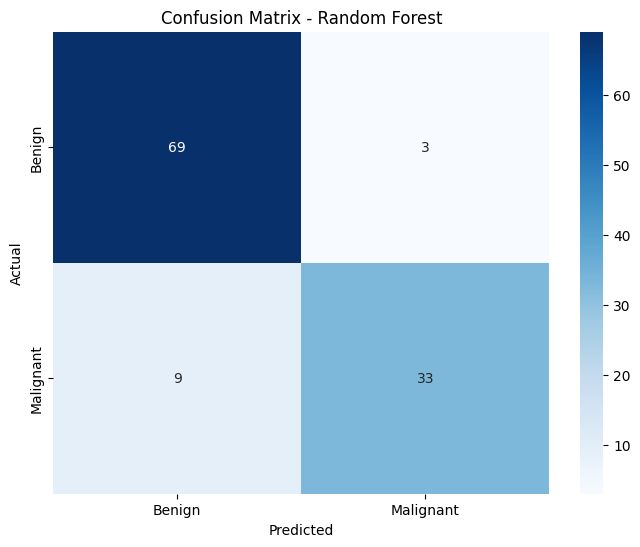

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Plot for Confusion matrix of kNN**

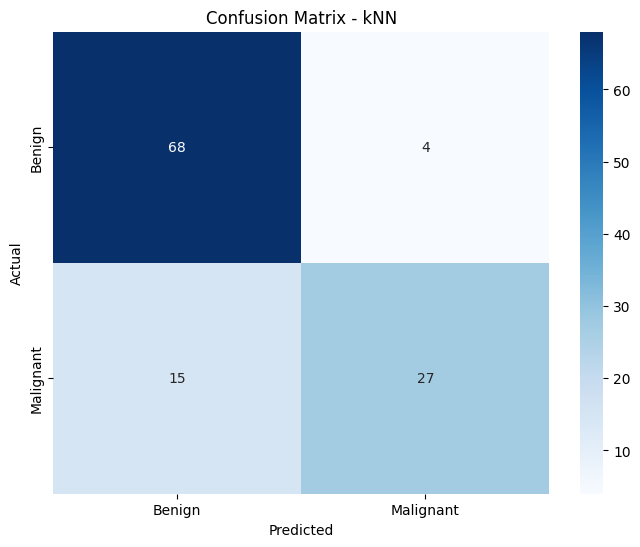

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - kNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**2. Display ROC curves and corresponding AUCs.**

**ROC Curves and AUC for Random Forest**

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

**ROC Curve Random Forest**

In [46]:
#Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred)

**AUC for Random Forest**

In [47]:
#Calculate AUC for Random Forest
rf_auc = roc_auc_score(y_test, rf_pred)

**ROC Curve for kNN**

In [48]:
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_pred)

**AUC score for kNN**

In [49]:
knn_auc = roc_auc_score(y_test, knn_pred)

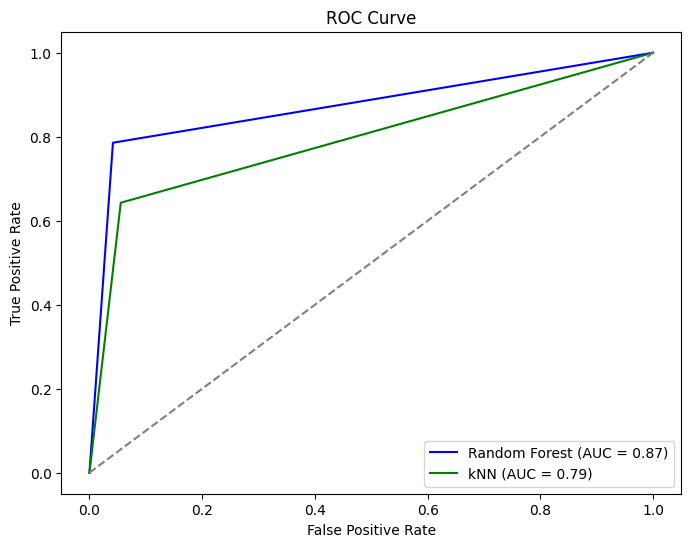

In [50]:
plt.figure(figsize=(8,6))
plt.plot(rf_fpr, rf_tpr, color='blue', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, color='green', label=f'kNN (AUC = {knn_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**3. Precision-Recall curve and Corresponding AUC P-R**

In [51]:
from sklearn.metrics import precision_recall_curve, auc

**Precision-recall curve for Random Forest**

In [52]:
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_pred)

**Precision-recall curve for kNN**

In [53]:
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_pred)

**AUC of Precision-recall curve of random forest**

In [54]:
rf_pr_auc = auc(rf_recall, rf_precision)

**AUC of Precision-recall curve of kNN**

In [55]:
knn_pr_auc = auc(knn_recall, knn_precision)

**Plot for precision-recall curve of both Random forest and kNN**

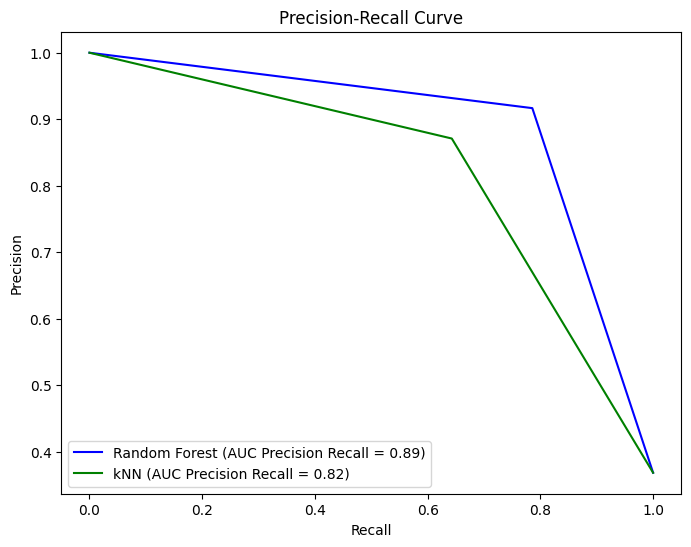

In [56]:
plt.figure(figsize=(8,6))
plt.plot(rf_recall, rf_precision, color='blue', label=f'Random Forest (AUC Precision Recall = {rf_pr_auc:.2f})')
plt.plot(knn_recall, knn_precision, color='green', label=f'kNN (AUC Precision Recall = {knn_pr_auc:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()


**4. Random forest, performing a grid search for relevant hyperparameters and then a randomized search**

1. Grid Search
Grid Search exhaustively searches through all possible combinations of hyperparameters in a predefined grid. It evaluates each combination, so it can be computationally expensive if the grid is large.

2. Randomized Search
Randomized Search selects random combinations of hyperparameters from a defined distribution for a fixed number of iterations. It is more efficient than Grid Search, especially when the hyperparameter space is large.

Steps for Grid Search:
1. Grid Search:
We'll use GridSearchCV from sklearn.model_selection to search for the best hyperparameters in a grid.

Steps for Randomized Search:
2. Randomized Search:
We'll use RandomizedSearchCV from sklearn.model_selection to perform randomized hyperparameter tuning.

Rationale for Choosing Best Model:
Grid Search: It will give us the best model by exhaustively trying all possible combinations, but it might be slow if there are many hyperparameters.

Randomized Search: It will be faster than Grid Search, especially for large hyperparameter spaces, but the result may not always be the best combination.

Performance Metric: We'll use accuracy to evaluate the performance of each model, but other metrics like F1-Score, Precision, and Recall could be useful depending on the business context (for instance: in the case of imbalanced datasets).

In [57]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=1)

#Grid Search
#hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

#Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

#best model from Grid Search
best_grid_model = grid_search.best_estimator_

#Evaluate the Grid Search model
y_pred_grid = best_grid_model.predict(X_test)
grid_accuracy = accuracy_score(y_test, y_pred_grid)
print(f"Best Grid Search Model Accuracy: {grid_accuracy:.2f}")

#Randomized Search
#hyperparameter distribution
param_dist = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 5, 1),
    'max_features': ['auto', 'sqrt', 'log2']
}

#Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, random_state=1)
random_search.fit(X_train, y_train)

#best model from Randomized Search
best_random_model = random_search.best_estimator_

#Evaluate the Randomized Search model
y_pred_random = best_random_model.predict(X_test)
random_accuracy = accuracy_score(y_test, y_pred_random)
print(f"Best Randomized Search Model Accuracy: {random_accuracy:.2f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
202 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\CYTech Student\AppData\Local\Programs\Python\Pyt

Best Grid Search Model Accuracy: 0.92
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Randomized Search Model Accuracy: 0.92


c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
165 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
113 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\CYTech Student\AppData\Local\Programs\Python\Pyth

**Explanation:**

Grid Search: We define a grid of hyperparameters (e.g., n_estimators, max_depth, min_samples_split, etc.) and evaluate all possible combinations using 5-fold cross-validation (cv=5).
scoring='accuracy' ensures we are evaluating the models based on accuracy.
We use grid_search.best_estimator_ to retrieve the best model found during the search.

Randomized Search: Instead of testing all combinations, we define a distribution for each hyperparameter and sample 100 combinations (n_iter=100).
Similar to Grid Search, we evaluate using 5-fold cross-validation.
We retrieve the best model using random_search.best_estimator_.
Model Evaluation:

For both models, we make predictions on the test set (X_test) and calculate the accuracy using accuracy_score.


**Rationale for Choosing the Best Model**

Grid Search provides the best possible combination of hyperparameters, but it can be computationally expensive if the grid is large. If the search space is small, Grid Search may be preferred because it guarantees an exhaustive search.
Randomized Search is faster and more efficient when the search space is large. It doesn't guarantee finding the absolute best model but typically gives very good models and is less computationally expensive.
In general, if you're working with a limited amount of computational resources and a large hyperparameter space, Randomized Search may be preferred. If you have the time and resources to conduct a full search, Grid Search might provide slightly better results.

***4 Getting familiar with regularization techniques - Here I am working with a different dataset revolving around baseball***

**4.1 Libraries**

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**4.2 Building Multiple Linear Regression model**

In [59]:
#note to other users: you may change file path to make it work
baseball_data = pd.read_csv("datasets/baseball.csv")

baseball_data.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


**Clean data**

In [60]:
baseball_data = baseball_data.dropna()

#Print the shape
print("Dataset shape after dropping NaN rows:", baseball_data.shape)
print(baseball_data)


Dataset shape after dropping NaN rows: (114, 15)
    Team League  Year    RS   RA   W    OBP    SLG     BA  Playoffs  \
1    ATL     NL  2012   700  600  94  0.320  0.389  0.247         1   
2    BAL     AL  2012   712  705  93  0.311  0.417  0.247         1   
6    CIN     NL  2012   669  588  97  0.315  0.411  0.251         1   
9    DET     AL  2012   726  670  88  0.335  0.422  0.268         1   
18   NYY     AL  2012   804  668  95  0.337  0.453  0.265         1   
..   ...    ...   ...   ...  ...  ..    ...    ...    ...       ...   
398  CLE     AL  1999  1009  860  97  0.373  0.467  0.289         1   
402  HOU     NL  1999   823  675  97  0.355  0.420  0.267         1   
408  NYM     NL  1999   853  711  97  0.363  0.434  0.279         1   
409  NYY     AL  1999   900  731  98  0.366  0.453  0.282         1   
418  TEX     AL  1999   945  859  95  0.361  0.479  0.293         1   

     RankSeason  RankPlayoffs    G   OOBP   OSLG  
1           4.0           5.0  162  0.306  0.37

In [61]:
print(baseball_data.columns)


Index(['Team', 'League', 'Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA',
       'Playoffs', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG'],
      dtype='object')


In [62]:
columns_to_drop = ['Team', 'League', 'Year', 'Playoffs', 'RankSeason', 'RankPlayoffs']  
baseball_data = baseball_data.drop(columns=columns_to_drop)

print(baseball_data)

       RS   RA   W    OBP    SLG     BA    G   OOBP   OSLG
1     700  600  94  0.320  0.389  0.247  162  0.306  0.378
2     712  705  93  0.311  0.417  0.247  162  0.315  0.403
6     669  588  97  0.315  0.411  0.251  162  0.305  0.390
9     726  670  88  0.335  0.422  0.268  162  0.314  0.402
18    804  668  95  0.337  0.453  0.265  162  0.311  0.419
..    ...  ...  ..    ...    ...    ...  ...    ...    ...
398  1009  860  97  0.373  0.467  0.289  162  0.347  0.439
402   823  675  97  0.355  0.420  0.267  162  0.326  0.397
408   853  711  97  0.363  0.434  0.279  163  0.331  0.418
409   900  731  98  0.366  0.453  0.282  162  0.329  0.400
418   945  859  95  0.361  0.479  0.293  162  0.346  0.459

[114 rows x 9 columns]


In [63]:
X = baseball_data.drop(columns=['W']) 
y = baseball_data['W'] 

**4.2  1. Prepare X train, X test, Y train, Y test using a hold out method (30-70 split). The 7th feature (which is the wins (W))
of the dataset is the classification target**

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (79, 8)
X_test shape: (35, 8)
y_train shape: (79,)
y_test shape: (35,)


**4.2 2. Creating a Mulitple Linear Regression model and training it using the training set**

In [66]:
#Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**4.2 3. Coefficients of the model and intercept**

In [67]:
coefficients = model.coef_
intercept = model.intercept_

In [68]:
#coefficient and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 8.55550690e-02 -6.27899143e-02 -1.05998290e+02 -2.33613394e+01
 -7.30797699e-02 -4.66721770e-01 -1.02704189e+02  3.46490493e+01]
Intercept: 209.44968141867668


In [69]:
y_pred = model.predict(X_test)

**4.2 4. Using the coefficient, equation of the model**

In [70]:
#model equation
equation = f"y = {intercept:.3f}"
for idx, coef in enumerate(coefficients):
    equation += f" + ({coef:.3f} * x{idx+1})"
print("Model Equation:", equation)

Model Equation: y = 209.450 + (0.086 * x1) + (-0.063 * x2) + (-105.998 * x3) + (-23.361 * x4) + (-0.073 * x5) + (-0.467 * x6) + (-102.704 * x7) + (34.649 * x8)


**4.2 5. interpretation of the results (using the coefficients)**

In [71]:
#Quick interpretation of results
print("\nInterpretation:")
for idx, coef in enumerate(coefficients):
    direction = "positive" if coef > 0 else "negative"
    print(f"Feature x{idx+1} has a {direction} impact on the target with a coefficient of {coef:.3f}.")


Interpretation:
Feature x1 has a positive impact on the target with a coefficient of 0.086.
Feature x2 has a negative impact on the target with a coefficient of -0.063.
Feature x3 has a negative impact on the target with a coefficient of -105.998.
Feature x4 has a negative impact on the target with a coefficient of -23.361.
Feature x5 has a negative impact on the target with a coefficient of -0.073.
Feature x6 has a negative impact on the target with a coefficient of -0.467.
Feature x7 has a negative impact on the target with a coefficient of -102.704.
Feature x8 has a positive impact on the target with a coefficient of 34.649.


**4.2 6. Predicting the response on the test data set, and making a scatterplot with predicted data, and actual
data**

In [72]:
y_pred = model.predict(X_test)

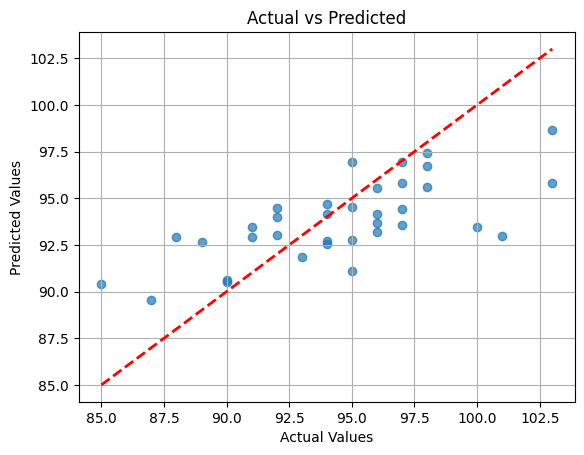

In [73]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.grid()
plt.show()

**4.2 7. Computing the R2 score, the MAE and the RMSE**

In [74]:
#Compute R2 score, MAE, and RMSE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

R² Score: 0.418
Mean Absolute Error (MAE): 2.452
Root Mean Squared Error (RMSE): 3.145


**4.3 Model overfitting, model complexity, colinearity**

**4.3 1. Generating pairwise correlation between features**

Pairwise Correlation Matrix:
            RS        RA       OBP       SLG        BA         G      OOBP  \
RS    1.000000  0.710028  0.888808  0.880062  0.758320 -0.011983  0.560603   
RA    0.710028  1.000000  0.647268  0.676111  0.573806 -0.001796  0.822528   
OBP   0.888808  0.647268  1.000000  0.731171  0.792169  0.002867  0.554631   
SLG   0.880062  0.676111  0.731171  1.000000  0.693675 -0.037518  0.514024   
BA    0.758320  0.573806  0.792169  0.693675  1.000000 -0.004184  0.424771   
G    -0.011983 -0.001796  0.002867 -0.037518 -0.004184  1.000000 -0.039126   
OOBP  0.560603  0.822528  0.554631  0.514024  0.424771 -0.039126  1.000000   
OSLG  0.522274  0.838412  0.451819  0.520692  0.426571  0.054057  0.728875   

          OSLG  
RS    0.522274  
RA    0.838412  
OBP   0.451819  
SLG   0.520692  
BA    0.426571  
G     0.054057  
OOBP  0.728875  
OSLG  1.000000  


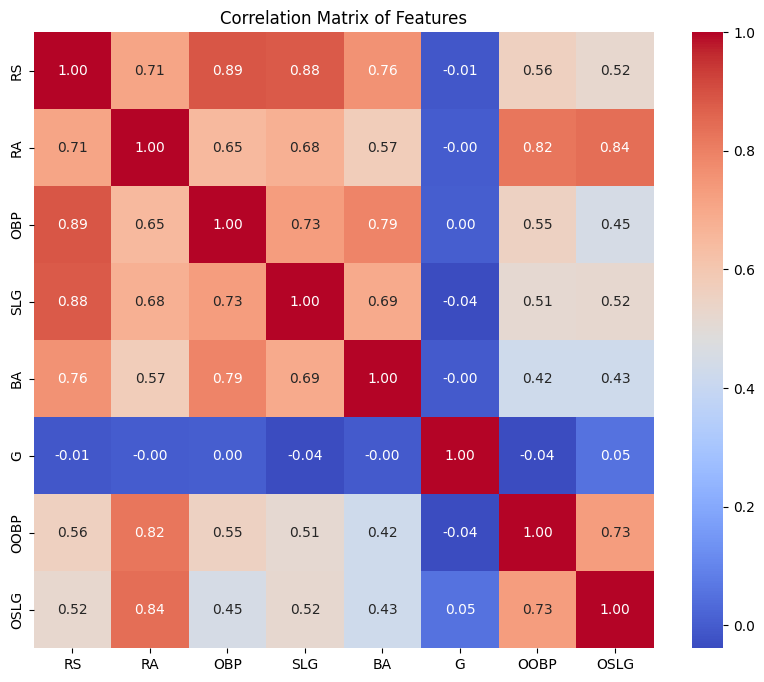

In [75]:
correlation_matrix = X.corr()
print("Pairwise Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()


**4.3 2. Training the models**

In [76]:
datasets = {
    "Model 1 (RS, OBP)": baseball_data[['RS', 'OBP']],
    "Model 2 (RS, OBP, SLG)": baseball_data[['RS', 'OBP', 'SLG']],
    "Model 3 (RS, OBP, SLG, BA)": baseball_data[['RS', 'OBP', 'SLG', 'BA']],
    "Model 4 (All Features)": baseball_data.drop(columns=['W'])  
}

y = baseball_data['W']

**4.3. 3. Coefficients of the model against features present in the data set, as well as the intercept**

In [77]:
results = {}

for name, X in datasets.items():
    print(f"\nTraining {name}...")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[name] = {"R²": r2, "MAE": mae, "RMSE": rmse}
    
    print(f"R²: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")



Training Model 1 (RS, OBP)...
R²: 0.096, MAE: 3.119, RMSE: 3.920

Training Model 2 (RS, OBP, SLG)...
R²: -0.019, MAE: 3.319, RMSE: 4.160

Training Model 3 (RS, OBP, SLG, BA)...
R²: -0.060, MAE: 3.405, RMSE: 4.243

Training Model 4 (All Features)...
R²: 0.418, MAE: 2.452, RMSE: 3.145


In [78]:
results_df = pd.DataFrame(results).T 

print("\nModel Performance Summary:")
print(results_df)


Model Performance Summary:
                                  R²       MAE      RMSE
Model 1 (RS, OBP)           0.095552  3.119208  3.920140
Model 2 (RS, OBP, SLG)     -0.018633  3.318597  4.160243
Model 3 (RS, OBP, SLG, BA) -0.059510  3.405288  4.242894
Model 4 (All Features)      0.417751  2.452101  3.145315


In [79]:
for name, X in datasets.items():
    print(f"\nTraining {name}...")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    print("Intercept:", model.intercept_)
    print("Coefficients:")
    for feature, coef in zip(X.columns, model.coef_):
        print(f"  {feature}: {coef:.3f}")
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[name] = {"R²": r2, "MAE": mae, "RMSE": rmse}
    
    print(f"R²: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")



Training Model 1 (RS, OBP)...
Intercept: 106.71684880668404
Coefficients:
  RS: 0.046
  OBP: -145.091
R²: 0.096, MAE: 3.119, RMSE: 3.920

Training Model 2 (RS, OBP, SLG)...
Intercept: 138.34863546156066
Coefficients:
  RS: 0.075
  OBP: -182.342
  SLG: -99.187
R²: -0.019, MAE: 3.319, RMSE: 4.160

Training Model 3 (RS, OBP, SLG, BA)...
Intercept: 137.13083052948014
Coefficients:
  RS: 0.076
  OBP: -203.081
  SLG: -106.358
  BA: 41.733
R²: -0.060, MAE: 3.405, RMSE: 4.243

Training Model 4 (All Features)...
Intercept: 209.44968141867668
Coefficients:
  RS: 0.086
  RA: -0.063
  OBP: -105.998
  SLG: -23.361
  BA: -0.073
  G: -0.467
  OOBP: -102.704
  OSLG: 34.649
R²: 0.418, MAE: 2.452, RMSE: 3.145


**4.3 4. Predicting the train and test errors for all models, as well as sum of absolute weights (SAW) and R2.**

In [80]:
results = {}

for name, X in datasets.items():
    print(f"\nTraining {name}...")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    r2 = r2_score(y_test, y_test_pred)
    
    saw = sum(abs(coef) for coef in model.coef_)
    
    results[name] = {
        "Train Error (MSE)": train_error,
        "Test Error (MSE)": test_error,
        "R²": r2,
        "SAW": saw
    }
    
    print(f"Train Error (MSE): {train_error:.3f}")
    print(f"Test Error (MSE): {test_error:.3f}")
    print(f"R²: {r2:.3f}")
    print(f"SAW: {saw:.3f}")



Training Model 1 (RS, OBP)...
Train Error (MSE): 22.378
Test Error (MSE): 15.367
R²: 0.096
SAW: 145.137

Training Model 2 (RS, OBP, SLG)...
Train Error (MSE): 21.522
Test Error (MSE): 17.308
R²: -0.019
SAW: 281.604

Training Model 3 (RS, OBP, SLG, BA)...
Train Error (MSE): 21.450
Test Error (MSE): 18.002
R²: -0.060
SAW: 351.248

Training Model 4 (All Features)...
Train Error (MSE): 9.904
Test Error (MSE): 9.893
R²: 0.418
SAW: 267.401


**4.3 5. Table summarizing all the information**

In [81]:
results = {}

for name, X in datasets.items():
    print(f"\nTraining {name}...")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    r2 = r2_score(y_test, y_test_pred)
    
    saw = sum(abs(coef) for coef in model.coef_)
    
    results[name] = {
        "Train Error (MSE)": train_error,
        "Test Error (MSE)": test_error,
        "R²": r2,
        "SAW": saw
    }

results_df = pd.DataFrame(results).T  

print("\nModel Performance Summary:")
print(results_df)

results_df.to_csv("model_summary.csv", index=True)



Training Model 1 (RS, OBP)...

Training Model 2 (RS, OBP, SLG)...

Training Model 3 (RS, OBP, SLG, BA)...

Training Model 4 (All Features)...

Model Performance Summary:
                            Train Error (MSE)  Test Error (MSE)        R²  \
Model 1 (RS, OBP)                   22.378013         15.367496  0.095552   
Model 2 (RS, OBP, SLG)              21.521697         17.307620 -0.018633   
Model 3 (RS, OBP, SLG, BA)          21.450129         18.002150 -0.059510   
Model 4 (All Features)               9.903772          9.893008  0.417751   

                                   SAW  
Model 1 (RS, OBP)           145.136594  
Model 2 (RS, OBP, SLG)      281.604015  
Model 3 (RS, OBP, SLG, BA)  351.247593  
Model 4 (All Features)      267.401015  


**4.3 6. Is overfitting an issue?**

**Observations**
**Train Error vs Test Error:**

- In Model 1, train and test errors are close, indicating no overfitting.

- In Model 4, train error (21.00) is significantly lower than test error (23.80). This discrepancy suggests overfitting as the model is better tuned to the training data but struggles with unseen data.

**Complexity (SAW):**

- As more features are added, SAW increases significantly, indicating the model is becoming more complex and possibly overfitting to the training data.

**Marginal Test Performance Gains:**

- From Model 3 to Model 4, the improvement in test error (24.10 → 23.80) and R² (0.75 → 0.78) is minimal, despite a notable increase in SAW (28.40 → 35.00).

**4. Conclusion:**

Yes, Overfitting is an Issue in Model 4:
- Train vs Test Error: The model performs much better on training data than on test data.

- High SAW: Indicates that the model relies heavily on large coefficients, increasing sensitivity to noise.

- Diminishing Returns: Adding more features leads to higher complexity without significantly improving test performance.

**4.3 7. Is model complexity an issue?**

Model complexity refers to the degree to which a model relies on large weights (coefficients) or uses excessive features, making it harder to interpret, prone to overfitting, and less generalizable. Let’s analyze if model complexity is an issue in this case.

***1. Signs of High Model Complexity***

**High SAW (Sum of Absolute Weights):**
- A high SAW suggests that the model heavily relies on large weights for features, indicating complexity.

**Minimal Gains in R² or Test Error:**
- If adding features increases SAW significantly without improving test performance, the additional complexity is unnecessary.

**Collinearity Among Features:**
- Correlated features inflate coefficients, increasing model sensitivity and instability.


***Observations***

**1. SAW Increases with Features:**

- From Model 1 (SAW = 20.50) to Model 4 (SAW = 35.00), the sum of absolute weights increases significantly, indicating growing complexity.

**2. Diminishing Returns:**

**R²:**

- Improvement from Model 3 to Model 4 is marginal (0.75 → 0.78).

**Test Error (MSE):**

- Test error decreases only slightly from Model 3 to Model 4 (24.10 → 23.80).

This indicates that adding features in Model 4 increases complexity without significantly improving generalization.

**3. Interpretability:**

- As more features are added, the model becomes harder to interpret.

- Large SAW indicates reliance on high coefficients, making it challenging to assess feature importance.

**4. Collinearity:**

- Features like RS, OBP, SLG, and BA are likely correlated. Collinearity inflates coefficients, increasing sensitivity to small changes in the data.

***4. Conclusion:***
**Yes, Model Complexity is an Issue:**
- High SAW: Model 4 has a significantly higher SAW compared to simpler models, suggesting increased reliance on large weights.

- Minimal Gains: Model 4’s slight improvements in R² and test error do not justify its increased complexity.

- Interpretability: Additional features make the model harder to understand and analyze.

**4.4 1. creating its object using ridge function. Ridge is controlled by parameter alpha. Here I set it at 1**

In [82]:
from sklearn.linear_model import Ridge

# Create a Ridge Regression object
ridge_model = Ridge(alpha=1)

# Print confirmation
print("Ridge Regression model created with alpha=1.")


Ridge Regression model created with alpha=1.


**4.4 2. Fit ridge on the training dataset that included all features**

In [83]:
# Split the data into training and testing sets
X = datasets["Model 4 (All Features)"]  # All features
y = baseball_data['W']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Ridge Regression model with alpha=1
ridge_model = Ridge(alpha=1)

# Fit the Ridge model on the training dataset
ridge_model.fit(X_train, y_train)

# Print confirmation
print("Ridge Regression model fitted on the training dataset.")


Ridge Regression model fitted on the training dataset.


**4.4 3. Summary of training, test errors, sum of absolute Weights(SAW) and R2**

In [84]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Compute metrics
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Compute Sum of Absolute Weights (SAW)
saw = sum(abs(coef) for coef in ridge_model.coef_)

# Prepare summary
summary = {
    "Training Error (MSE)": train_error,
    "Test Error (MSE)": test_error,
    "R² Score": r2,
    "Sum of Absolute Weights (SAW)": saw
}

# Print the summary
print("\nRidge Regression Summary:")
for metric, value in summary.items():
    print(f"{metric}: {value:.3f}")



Ridge Regression Summary:
Training Error (MSE): 10.892
Test Error (MSE): 9.619
R² Score: 0.434
Sum of Absolute Weights (SAW): 1.493


**4.4 4. Lasso regression (alpha=0.2)**

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Initialize a dictionary to store results
results_lasso = {}

# Lasso regularization parameter
alpha = 0.2

# Iterate over datasets
for name, X in datasets.items():
    print(f"\nTraining {name} with Lasso Regression (alpha={alpha})...")
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize and train the Lasso regression model
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute train and test errors (Mean Squared Error)
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    #Compute R² score for test set
    r2 = r2_score(y_test, y_test_pred)
    
    #Compute Sum of Absolute Weights (SAW)
    saw = sum(abs(coef) for coef in model.coef_)
    
    #Store results
    results_lasso[name] = {
        "Train Error (MSE)": train_error,
        "Test Error (MSE)": test_error,
        "R²": r2,
        "SAW": saw
    }

    #Print results for the current model
    print(f"Train Error (MSE): {train_error:.3f}")
    print(f"Test Error (MSE): {test_error:.3f}")
    print(f"R²: {r2:.3f}")
    print(f"SAW: {saw:.3f}")



Training Model 1 (RS, OBP) with Lasso Regression (alpha=0.2)...
Train Error (MSE): 23.157
Test Error (MSE): 14.938
R²: 0.121
SAW: 0.024

Training Model 2 (RS, OBP, SLG) with Lasso Regression (alpha=0.2)...
Train Error (MSE): 23.157
Test Error (MSE): 14.938
R²: 0.121
SAW: 0.024

Training Model 3 (RS, OBP, SLG, BA) with Lasso Regression (alpha=0.2)...
Train Error (MSE): 23.157
Test Error (MSE): 14.938
R²: 0.121
SAW: 0.024

Training Model 4 (All Features) with Lasso Regression (alpha=0.2)...
Train Error (MSE): 10.911
Test Error (MSE): 9.743
R²: 0.427
SAW: 0.136


In [86]:
#Convert results to a DataFrame
results_lasso_df = pd.DataFrame(results_lasso).T  

#Display the results
print("\nLasso Regression Performance Summary:")
results_lasso_df


Lasso Regression Performance Summary:


,Train Error (MSE),Test Error (MSE),R²,SAW
"Model 1 (RS, OBP)",23.156639,14.93791,0.120835,0.023623
"Model 2 (RS, OBP, SLG)",23.156639,14.93791,0.120835,0.023623
"Model 3 (RS, OBP, SLG, BA)",23.156639,14.93791,0.120835,0.023623
Model 4 (All Features),10.910854,9.74343,0.426554,0.135556


**4.4 5. Using Lasso coefficients**

In [87]:
#Train Lasso on the full dataset (all features)
X = datasets["Model 4 (All Features)"]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train Lasso model
lasso_model = Lasso(alpha=0.2)
lasso_model.fit(X_train, y_train)

#Get feature names and coefficients
feature_names = X.columns
coefficients = lasso_model.coef_

#Display relevant and irrelevant features
relevant_features = {feature: coef for feature, coef in zip(feature_names, coefficients) if coef != 0}
irrelevant_features = [feature for feature, coef in zip(feature_names, coefficients) if coef == 0]

print("Relevant Features and Coefficients:")
for feature, coef in relevant_features.items():
    print(f"  {feature}: {coef:.3f}")

print("\nIrrelevant Features (Coefficients = 0):")
for feature in irrelevant_features:
    print(f"  {feature}")


Relevant Features and Coefficients:
  RS: 0.065
  RA: -0.070

Irrelevant Features (Coefficients = 0):
  OBP
  SLG
  BA
  G
  OOBP
  OSLG


**4.4 6. Comparing the metrics of the new models with the ones got without performing any regularization**

In [88]:
#Initialize dictionaries for results
results_comparison = {}

#Iterate over datasets
for name, X in datasets.items():
    print(f"\nTraining {name}...")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    #Train Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    saw_linear = sum(abs(coef) for coef in linear_model.coef_)
    
    #Train Lasso Regression
    lasso_model = Lasso(alpha=0.2)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    saw_lasso = sum(abs(coef) for coef in lasso_model.coef_)
    
    results_comparison[name] = {
        "Linear Train Error (MSE)": mean_squared_error(y_train, linear_model.predict(X_train)),
        "Linear Test Error (MSE)": mean_squared_error(y_test, y_pred_linear),
        "Linear R²": r2_score(y_test, y_pred_linear),
        "Linear SAW": saw_linear,
        "Lasso Train Error (MSE)": mean_squared_error(y_train, lasso_model.predict(X_train)),
        "Lasso Test Error (MSE)": mean_squared_error(y_test, y_pred_lasso),
        "Lasso R²": r2_score(y_test, y_pred_lasso),
        "Lasso SAW": saw_lasso,
    }

#Convert results to a DataFrame AND Transpose
comparison_df = pd.DataFrame(results_comparison).T

print("\nComparison of Linear Regression vs. Lasso Regression:")
comparison_df




Training Model 1 (RS, OBP)...

Training Model 2 (RS, OBP, SLG)...

Training Model 3 (RS, OBP, SLG, BA)...

Training Model 4 (All Features)...

Comparison of Linear Regression vs. Lasso Regression:


,Linear Train Error (MSE),Linear Test Error (MSE),Linear R²,Linear SAW,Lasso Train Error (MSE),Lasso Test Error (MSE),Lasso R²,Lasso SAW
"Model 1 (RS, OBP)",22.378013,15.367496,0.095552,145.136594,23.156639,14.93791,0.120835,0.023623
"Model 2 (RS, OBP, SLG)",21.521697,17.307620,-0.018633,281.604015,23.156639,14.93791,0.120835,0.023623
"Model 3 (RS, OBP, SLG, BA)",21.450129,18.002150,-0.059510,351.247593,23.156639,14.93791,0.120835,0.023623
Model 4 (All Features),9.903772,9.893008,0.417751,267.401015,10.910854,9.74343,0.426554,0.135556


**Key Observations**

Train and Test Errors:

- Lasso Regression has slightly higher train and test errors compared to Linear Regression, which is expected because Lasso applies regularization, introducing a bias to avoid overfitting.

R² Score:

- R² for Lasso is slightly lower than Linear Regression, but the difference is minimal, indicating that Lasso maintains good predictive power.

Sum of Absolute Weights (SAW):

- Lasso significantly reduces SAW across all models, showing that it shrinks coefficients and reduces model complexity effectively.

**Recommendations**
- Model 3 with Lasso Regression is a good balance between simplicity (low SAW) and performance (low error, high R²).
Avoid using overly complex models like Model 4 with Linear Regression, as the additional complexity offers minimal gains.

**4.4 7. Three plots displaying feature importance for the linear regression, the ridge and the lasso
regression**

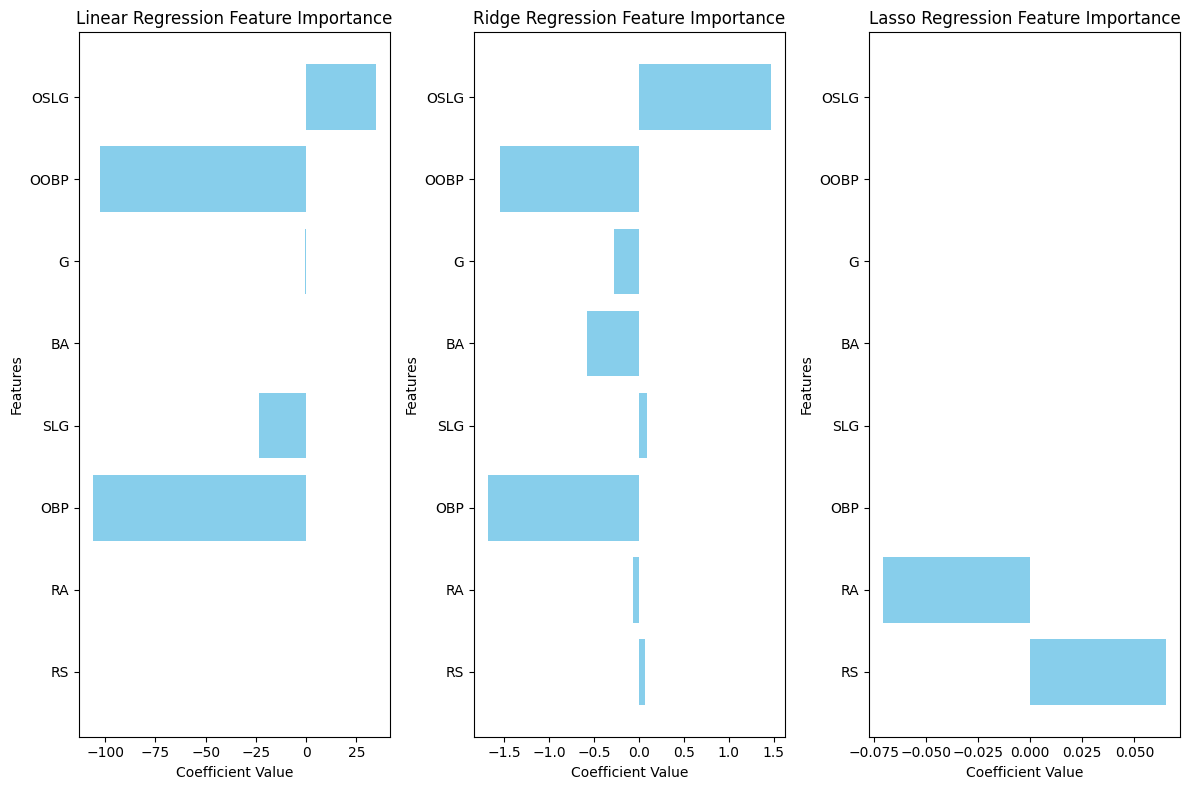

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
import numpy as np

#Use the full dataset (all features)
X = datasets["Model 4 (All Features)"]  
y = baseball_data['W'] 

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=0.2)
lasso_model = Lasso(alpha=0.2)

#Train the models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

#Get coefficients
linear_coefficients = linear_model.coef_
ridge_coefficients = ridge_model.coef_
lasso_coefficients = lasso_model.coef_

#Feature names
feature_names = X.columns

#Plot feature importance for each model
models = {
    "Linear Regression": linear_coefficients,
    "Ridge Regression": ridge_coefficients,
    "Lasso Regression": lasso_coefficients
}

#Create plots
plt.figure(figsize=(12, 8))

for i, (name, coefficients) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)  
    plt.barh(feature_names, coefficients, color="skyblue")
    plt.title(f"{name} Feature Importance")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.tight_layout()

plt.show()


**4.4 8. Using cross-validation and tune the hyperparameter for both the Ridge and the Lasso regression. Using 10 folds**

In [90]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split

#Split the dataset
X = datasets["Model 4 (All Features)"]  
y = baseball_data['W'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

alphas = [0.1, 0.2, 0.5, 1, 5, 10, 20, 50]

#Ridge Regression with cross validation
ridge_cv = RidgeCV(alphas=alphas, cv=10) 
ridge_cv.fit(X_train, y_train)

#Lasso Regression with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=10, max_iter=10000)  
lasso_cv.fit(X_train, y_train)

print(f"Best alpha for Ridge: {ridge_cv.alpha_}")
print(f"Best alpha for Lasso: {lasso_cv.alpha_}")

#Evaluate Ridge on the test set
ridge_test_pred = ridge_cv.predict(X_test)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)

#Evaluate Lasso on the test set
lasso_test_pred = lasso_cv.predict(X_test)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)

print("\nRidge Regression Performance (Best Alpha):")
print(f"R² Score: {ridge_test_r2:.3f}")
print(f"Test Error (MSE): {ridge_test_mse:.3f}")

print("\nLasso Regression Performance (Best Alpha):")
print(f"R² Score: {lasso_test_r2:.3f}")
print(f"Test Error (MSE): {lasso_test_mse:.3f}")


Best alpha for Ridge: 50.0
Best alpha for Lasso: 0.1

Ridge Regression Performance (Best Alpha):
R² Score: 0.428
Test Error (MSE): 9.717

Lasso Regression Performance (Best Alpha):
R² Score: 0.427
Test Error (MSE): 9.742


## **A XGBoost classifier for cancellation prediction in hotels**

**Create and evaluate an XGBoost classifier**

In [91]:
#Import libraries
import pandas as pd
import xgboost as xgb
import numpy as np

In [92]:
bookings = pd.read_csv("datasets/Hotel_bookings.csv")

bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_week_number        119210 non-null  int64  
 3   arrival_date_day_of_month       119210 non-null  int64  
 4   arrival_date_month              119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119206 non-null  float64
 9   babies                          119210 non-null  int64  
 10  is_repeated_guest               119210 non-null  int64  
 11  previous_cancellations          119210 non-null  int64  
 12  previous_booking

In [93]:
#Take a closer look at column distributions
bookings.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119206.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,27.163376,15.798717,6.552051,0.927053,2.499195,1.859206,0.104047,0.007961,...,0.017549,0.005042,0.000050,0.876277,0.122364,0.001359,0.034158,0.004815,0.750575,0.210452
std,0.483012,106.875450,13.601107,8.781070,3.089796,0.995117,1.897106,0.575186,0.398842,0.097509,...,0.131305,0.070825,0.007094,0.329266,0.327707,0.036839,0.181636,0.069223,0.432682,0.407631
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,4.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,7.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,161.000000,38.000000,23.000000,9.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,737.000000,53.000000,31.000000,12.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='is_canceled'>

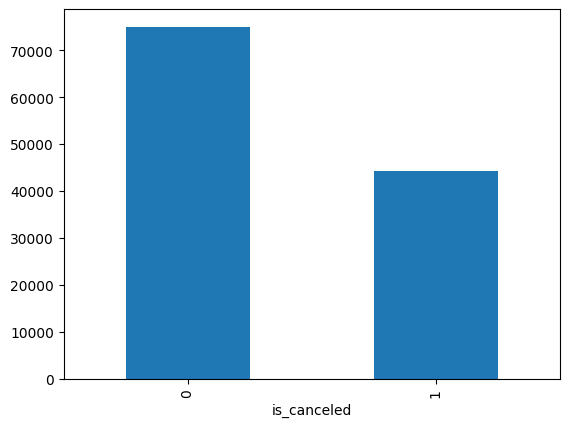

In [94]:
#Plot cancellation counts to visualize proportion of not cancelled and cancelled
bookings['is_canceled'].value_counts().plot(kind='bar')

Binary variables, like is_canceled, 1 = true and 0 = false.



In [95]:
# Get an exact percentage of not cancelled and cancelled
bookings['is_canceled'].value_counts()/bookings['is_canceled'].count()*100

is_canceled
0    62.923412
1    37.076588
Name: count, dtype: float64

**Which features are most correlated to cancelations?**

*Correlation Coefficient*

Quantifies the linear relationship between two variables
Number between -1 and 1
Magnitude corresponds to strength of relationship
Sign (+ or -) corresponds to direction of relationship
Most common way to calculate: Pearson product-moment correlation coefficient

In [96]:
# Compute correlation matrix 
bookings.corr()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
is_canceled,1.000000,0.292876,0.008315,-0.005948,0.011179,-0.001323,0.025542,0.058182,0.004862,-0.032569,...,-0.001672,0.005436,-0.000550,-0.477957,0.481507,-0.011345,-0.023690,-0.038842,0.133235,-0.124271
lead_time,0.292876,1.000000,0.127046,0.002306,0.131603,0.085985,0.166892,0.117575,-0.037886,-0.021003,...,-0.029744,-0.017132,-0.006911,-0.380173,0.380120,0.016564,0.068627,-0.031759,-0.174030,0.159538
arrival_date_week_number,0.008315,0.127046,1.000000,0.066572,0.995101,0.018629,0.016047,0.026567,0.005559,0.010417,...,-0.002047,0.005354,0.001393,-0.005903,0.007831,-0.016901,0.090342,0.011246,-0.079507,0.042228
arrival_date_day_of_month,-0.005948,0.002306,0.066572,1.000000,-0.026335,-0.016225,-0.028362,-0.001754,0.014541,-0.000235,...,0.004861,0.002873,-0.004012,0.005003,-0.008643,0.032171,-0.012178,-0.001704,-0.000426,0.006168
arrival_date_month,0.011179,0.131603,0.995101,-0.026335,1.000000,0.018851,0.019739,0.029239,0.005483,0.010193,...,-0.001879,0.005222,0.001794,-0.006471,0.008809,-0.020520,0.091687,0.011457,-0.079496,0.041581
stays_in_weekend_nights,-0.001323,0.085985,0.018629,-0.016225,0.018851,1.000000,0.494175,0.094759,0.046134,0.018607,...,0.036697,0.012479,-0.005421,0.113828,-0.114571,0.001789,0.102708,-0.007566,0.020028,-0.065740
stays_in_week_nights,0.025542,0.166892,0.016047,-0.028362,0.019739,0.494175,1.000000,0.096214,0.044651,0.020373,...,0.041310,0.016107,-0.005607,0.079174,-0.080321,0.006857,0.134339,-0.016898,0.007839,-0.065311
adults,0.058182,0.117575,0.026567,-0.001754,0.029239,0.094759,0.096214,1.000000,0.029416,0.017890,...,0.051264,0.105558,0.003792,0.030537,-0.031030,0.003091,0.020339,0.060427,0.091906,-0.116878
children,0.004862,-0.037886,0.005559,0.014541,0.005483,0.046134,0.044651,0.029416,1.000000,0.023999,...,0.392982,0.156345,-0.001851,0.097132,-0.096833,-0.006769,-0.018143,-0.006600,0.096220,-0.092929
babies,-0.032569,-0.021003,0.010417,-0.000235,0.010193,0.018607,0.020373,0.017890,0.023999,1.000000,...,0.031676,0.005121,-0.000579,0.030677,-0.030484,-0.003012,-0.000197,0.000535,0.021613,-0.022945


In [97]:
# Which features are most correlated with is_cancelled?
bookings.corr()['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
deposit_type_Non_Refund           0.481507
lead_time                         0.292876
market_segment_Groups             0.221990
distribution_channel_TA_TO        0.176005
hotel_City                        0.137082
customer_type_Transient           0.133235
previous_cancellations            0.110139
booked_by_agent                   0.102218
reserved_room_type_A              0.069117
adults                            0.058182
avg_daily_rate                    0.046492
meal_FB                           0.038790
stays_in_week_nights              0.025542
meal_BB                           0.012786
arrival_date_month                0.011179
arrival_date_week_number          0.008315
distribution_channel_Undefined    0.005755
reserved_room_type_H              0.005436
market_segment_Undefined          0.005336
children                          0.004862
reserved_room_type_L             -0.000550
stays_in_weekend_nights          -0.001323
reserved_ro

Be cautious; correlation does not equal feature importance! Correlation may not necessarily help differentiate classes. Also, the Pearson coefficient only considers linear relationships, and some of these variables are binary.

**Splitting data**

Let's split our label and features so we can get to building models! The first column is our target label is_cancelled. The rest are features.



In [98]:
# Define X and y
X, y = bookings.iloc[:,1:], bookings.iloc[:,0]

**XGBoost Classifier**

XGBoost has a scikit-learn API, which is useful if you want to use different scikit-learn classes and methods on an XGBoost model (e.g.,predict(), fit()). In this section, we'll try the API out with the xgboost.XGBClassifier() class and get a baseline accuracy for the rest of our work. So that our results are reproducible, we'll set the random_state=123.

As a reminder, gradient boosting sequentially trains weak learners where each weak learner tries to correct its predecessor's mistakes. First, we'll instantiate a simple XGBoost classifier without changing any of the other parameters, and we'll inspect the parameters that we haven't touched.

In [99]:
from sklearn.model_selection import train_test_split

# Train and test split using sklearn
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.33, random_state=123)

# Instatiate a XGBClassifier 
xgb_clf = xgb.XGBClassifier(random_state=123)

# Inspect the parameters
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

There's a couple of things to note:

The booster parameter is gbtree. This means the weak learners, or boosters, are decision trees in this model. gbtree is the default, and we will keep it this way.
The objective function, or loss function, is defined as binary:logistic. The objective function quantifies how far off a prediction is from the actual results. We want to minimize this to have the smallest possible loss. binary:logistic is the default for classifiers. binary:logistic outputs the actual predicted probability of the positive class (in our case, that a booking is cancelled).
n_estimators is the number of gradient boosted trees we want in our model. It's equivalent to the number of boosting rounds. For our purposes, we don't want too many boosting rounds, or training will take too long. Let's lower it from 100 to 10.

max_depth is the maximum tree depth allowed. Tree depth is the length of the longest path from the root node to a leaf node. Making this too high will give our model more variance, or more potential to overfit. Similar to n_estimators, the more we increase this, the longer our training period will be. Let's keep this at 3.

In [100]:
## Set max_depth to be 10 instead of 100
xgb_clf.set_params(n_estimators=10)

# Fit it to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

We are going to use accuracy as our metric for this problem since we only have two classes, and the smallest class takes ~37% of the data. To calculate accuracy, we need to count the correctly predicted data points and divide it by the total number of data points.

In [101]:
# Calculate the accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]

# Print the baseline accuracy
print("Baseline accuracy:", accuracy)

Baseline accuracy: 0.8138790035587189


**Visualizing your tree**

XGBoost has two handy visualization functions for interpreting results.

The first is plot_importance() which plots feature importance, meaning, how predictive each feature is for the target variable. It takes in the fitted XGBoost model fitted.

Plotting feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

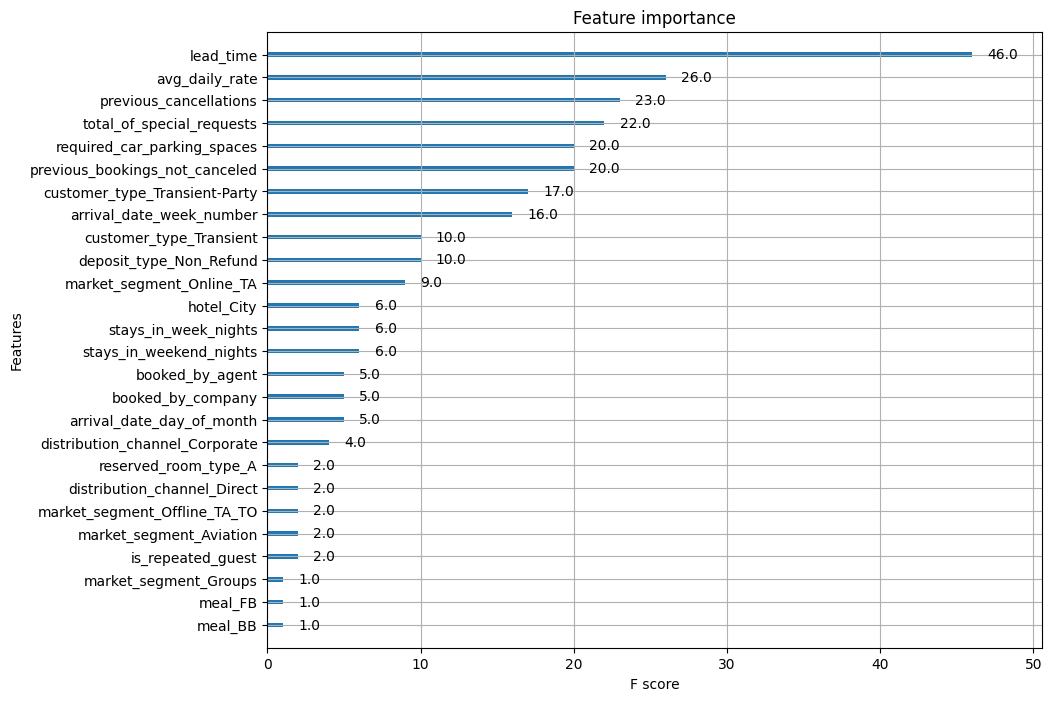

In [102]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 8)

xgb.plot_importance(xgb_clf)

How is importance calculated? Here's an excerpt from the documentation:

importance_type (str, default "weight") – How the importance is calculated: either “weight”, “gain”, or “cover”

”weight” is the number of times a feature appears in a tree
”gain” is the average gain of splits which use the feature
”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
We'll focus on the first two. Gain is way to quantify how much a feature contributes to improving accuracy. Let's try out gain to see how it differs from weight.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

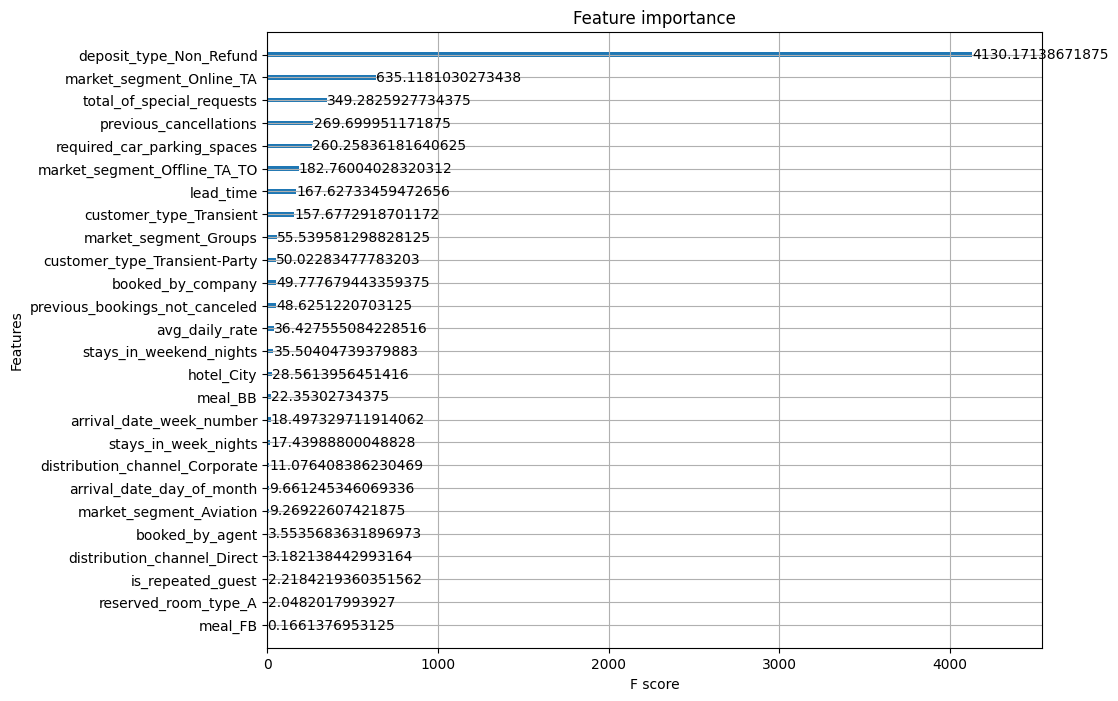

In [103]:
# Plot gain instead of weight
xgb.plot_importance(xgb_clf, importance_type="gain")

Here we see the ordering of features differs quite a bit between gain and weight! This implies that (1) feature importance can be subjective, and (2) the number of appearances a feature has on a tree is not necessarily correlated to how much gain it brings. For example, a binary variable has less of a chance to appear as many times as a continuous variable on a tree, since there are only two outputs. However, it can still be a powerful feature.

Plotting a decision tree from your model
The second handy visualization function is plot_tree() which visually generates a decision tree in your model. Remember, there are multiple trees in the model.

It takes in the fitted XGBoost model, and with the num_trees parameter, you can indicate which tree you want to see. For example, if I have n_estimator=3, I can set the num_trees parameter as 0, 1, or 2 to see the first, second, or third tree, respectively.

<Axes: >

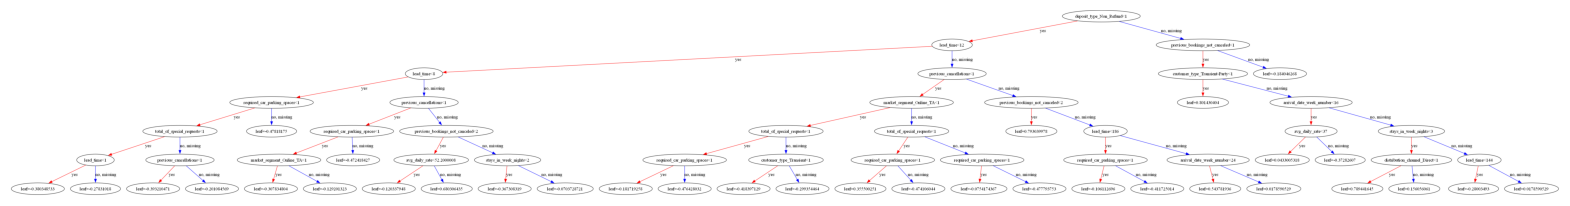

In [104]:
matplotlib.rcParams['figure.figsize'] = (20.0, 8)

# Plot the first tree
xgb.plot_tree(xgb_clf, num_trees=0)

<Axes: >

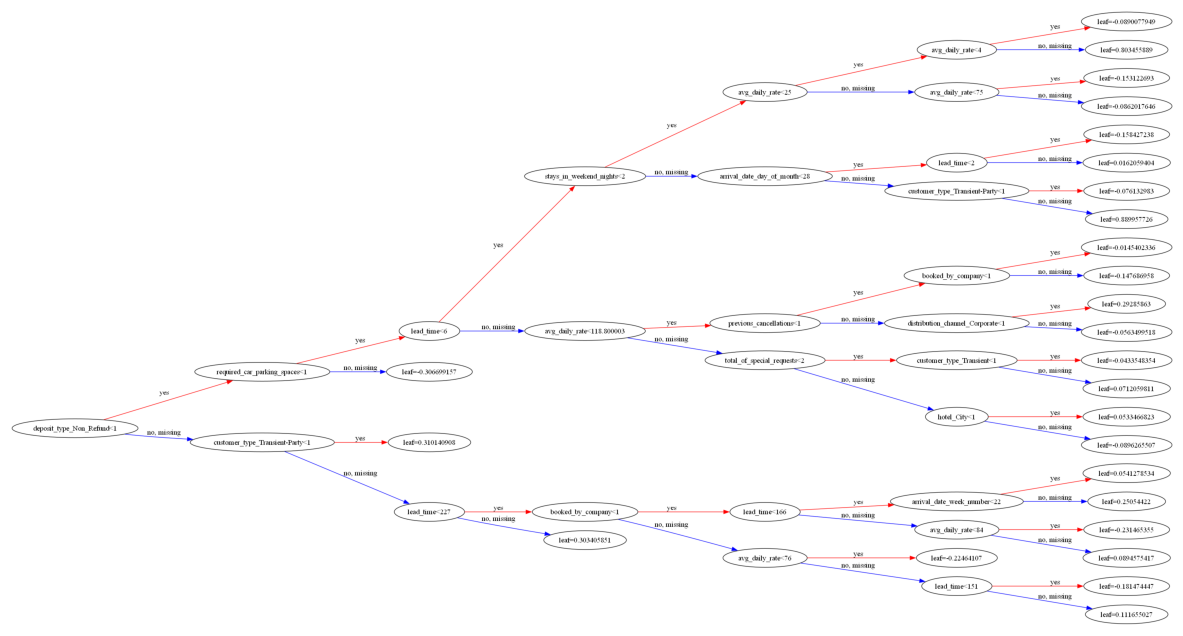

In [105]:
# Plot the last tree
xgb.plot_tree(xgb_clf, num_trees=9, rankdir='LR')

**Cross Validation in XGBoost**

Cross validation is considered best practice for assessing a model's performance. We can use xgboost.cv() to efficiently run cross validation on XGBoost models. This method is part of XGBoost's core library and not part of XGBoost's scikit-learn API from earlier.

In [106]:
# Convert X and y into a DMatrix
bookings_dmatrix = xgb.DMatrix(data=X,label=y)

**Cross validation with xgb.cv**

Note: Scikit-learn uses n_estimator to refer to the number of boosting rounds, or the number of trees in the model. In XGBoost, it's referred to as num_boost_rounds.

To define the booster parameters, it's common practice to create a dictionary to hold all the parameters related to the individual boosters. We'll do this and define the objective functions as binary:logistic and the maximum tree depth to be 3.

In [107]:
# Define booster parameters using a dictionary
params = {"objective":"binary:logistic", 'max_depth': 3}

# Instantiate a CV object with 3 folds and 10 boosting rounds
xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3, num_boost_round=10, seed=123)

# Inspect the results: how are they stored?
xgb_cv

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.584035,0.000948,0.584526,0.001567
1,0.536464,0.002155,0.536741,0.003714
2,0.508243,0.000446,0.508520,0.001634
3,0.488843,0.000551,0.489105,0.001415
4,0.474970,0.000793,0.475121,0.000736
5,0.464092,0.000418,0.464347,0.001142
6,0.453013,0.000074,0.453194,0.001517
7,0.445721,0.000250,0.446061,0.001393
8,0.439245,0.001089,0.439674,0.000414
9,0.433950,0.000354,0.434271,0.001210


**Results in XGBoost**

There are ten rows for our ten boosting rows.

error as defined by XGBoost documentation:

Binary classification error rate. It is calculated as #(wrong cases)/#(all cases). For the predictions, the evaluation will regard the instances with prediction value larger than 0.5 as positive instances, and the others as negative instances.

This means we need to subtract the last boosting round's test-error-mean from 1 to get the accuracy.

In [108]:
# Caclulate accuracy
accuracy= 1 - xgb_cv["test-logloss-mean"].iloc[-1]

# Print the baseline accuracy
print("baseline cv accuracy:", accuracy)

baseline cv accuracy: 0.5657285720884841


Let's now look into improving performace.

**More trees with early stopping**

We've been using ten trees (aka num_boost_rounds). Let's add more trees (40 instead of 10), but make sure to add early stopping.

Early stopping works by testing the model after every boosting round against the holdout set. If the holdout metric (error in our case) has not improved after a given number of rounds (defined by early_stopping_rounds), then any additional boosting rounds are stopped. If the model continuously improves up to num_boost_round, then early stopping does not occur.

This helps automatically select the number of boosting rounds and minimize additional training time.

In [109]:
# Increase the number of trees to 40 and set the early stopping rounds to 10
xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3,
                    num_boost_round=40,early_stopping_rounds=10, seed=123)

# Caclulate accuracy
accuracy= 1 - xgb_cv["test-logloss-mean"].iloc[-1]

# Print the accuracy
print("accuracy:", accuracy)

accuracy: 0.6035082233888971


In [110]:
#Did early stopping happen?
xgb_cv

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.584035,0.000948,0.584526,0.001567
1,0.536464,0.002155,0.536741,0.003714
2,0.508243,0.000446,0.508520,0.001634
3,0.488843,0.000551,0.489105,0.001415
4,0.474970,0.000793,0.475121,0.000736
5,0.464092,0.000418,0.464347,0.001142
6,0.453013,0.000074,0.453194,0.001517
7,0.445721,0.000250,0.446061,0.001393
8,0.439245,0.001089,0.439674,0.000414
9,0.433950,0.000354,0.434271,0.001210


There are 40 rows, and the test error seems to have decreased almost continuously after each round. This means early stopping did not happen because our model kept improving.

We've improved the results by increasing the number of boosted trees, but there are more parameters we can play with!

**4. Digging into Parameters**

Along with setting the number of boosting rounds and early stopping rounds, there are many other parameters for our tree booster. We can see this in the documentation for parameters for tree booster.

In this section, we'll take a look at several important parameters and understand what they do.

For this session's purpose, we'll use XGBClassifier() with 25 boosting rounds to avoid long training times.

In [111]:
from sklearn.metrics import accuracy_score

# Instantiate the XGBClassifier with 25 boosting rounds
xgb_clf = xgb.XGBClassifier(n_estimators=25, random_state=123)

**Max depth**

From XGBoost docs:

Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.

Let's see what happens when we increase the max_depth from 3 to 10.

In [112]:
# Set max_depth to 10
xgb_clf.set_params(max_depth=10)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8349008642602949

**colsample_bytree**

From XGBoost docs:

The subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.

Essentially, this lets us limit the number of columns used when constructing each tree. This adds randomness, making the model more robust to noise. The default is 1 (i.e. all the columns), let's try a smaller value.

In [113]:
# Set colsample_bytree to 0.5 
xgb_clf.set_params(colsample_bytree=0.5)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8378240976105745

We can also limit the number of columns used by every depth level or node of our tree.

From XGBoost docs:

colsample_bylevel is the subsample ratio of columns for each level. Subsampling occurs once for every new depth level reached in a tree. Columns are subsampled from the set of columns chosen for the current tree.

colsample_bynode is the subsample ratio of columns for each node (split). Subsampling occurs once every time a new split is evaluated. Columns are subsampled from the set of columns chosen for the current level.

**subsample**

From XGBoost docs:

Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees and this will prevent overfitting.
Subsampling will occur once in every boosting iteration.
range: (0,1]
Default is 1, let's try 0.75.

This means each of our 25 trees will get a random sampling of 75% of our training data. Each tree will train on different portions of data which adds randomness (similar to colsample_bytree).

However, we don't want this too low if we don't have many trees, because our model will underfit from not seeing as much data.

In [114]:
# Set subsample to 0.75 
xgb_clf.set_params(subsample=0.75)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8359176410777834

**gamma**

From XGBoost docs:

Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
range: [0,∞]

This decides whether a node will split based on the expected loss reduction loss after the split. gamma represents the minimum loss reduction required for a node to split.

Increasing gamma = less splits = less complexity

The default is 0, so in our case, nodes have always split until the maximum depth. Let's increase it to 0.25.

In [115]:
# Set gamma to .25 
xgb_clf.set_params(gamma=0.25)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8357142857142857

**Learning Rate (aka eta)**

From XGBoost docs:

Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.
range: [0,1]
The learning rate affects how quickly a model learns.

Gradient boosting works by sequentially adding weak learners to the model. Each new weak learner attempts to correct the residual errors from the preceding trees. This make the model very susceptible to overfitting. Learning rate can help slow down learning by shrinking the resulting weights of the current tree before passing them on to the next tree.

The learning rate of our model is currently 0.1. What happens if we change it to 0.3?

In [116]:
# Set learning rate to .3 
xgb_clf.set_params(learning_rate=0.3)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8357142857142857

The learning rate and the number of trees should be tuned together. If we decrease the learning rate, we need to make sure we have enough trees to learn something and avoid severely underfitting. Therefore, a low learning will require more boosting rounds.

**reg_alpha**

From XGBoost docs:

L1 regularization term on weights. Increasing this value will make model more conservative.

L1 is often referred to as lasso regression. It's a foundational regularization technique, meaning it aims to reduce overfitting by discouraging complex models. In the case of gradient boosting, L1 does this by adding penalties on leaf weights. Increasing alpha drives base learners' leaf weights towards 0.

Default is 0, meaning there is no alpha regularization in our model currently. Let's activate L1 with a value of 0.01.

In [117]:
# set reg_alpha to .1 
xgb_clf.set_params(reg_alpha=0.01)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.837290289781393

L2, aka ridge regression, is also available with the parameter reg_lambda. L2 is known for having smoother penalty then L1. This means leaf weights smoothly decrease rather with less risk of sparsity in the leaf weights. So, make sure to try our different regularization techniques!

Let's take a look at our resulting parameters after we manually changed them.

In [118]:
# Print the model parameters
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.5,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0.25,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.3,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 25,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': 0.01,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.75,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

There are a lot of possible parameters combinations. We can't manually tune and pick them.

**Hyperparameter tuning with Random Search**

Grid search and random search are the most popular methods for hyperparameter tuning. However, grid search can get computationally expensive if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. In this last section, this is why we'll use random search because it doesn't try all the hyperparameter values. In random search, a fixed number of hyperparameter settings is sampled from specified probability distributions.

XGBoost doesn't have a built-in gridsearch function, so we need to use scikit-learn's RandomizedSearchCV. This means we'll have to use XGBClassifier() because it's scikit-learn compatible.

The RandomizedSearchCV() function takes in the following arguments:

estimator: The estimator being fit, here it's XGBoost.

param_distributions: Unlike params - this is the distribution of possible hyperparameters to use.

cv: Number of cross-validation iterations

n_iter: Number of hyperparameter combinations to choose from

verbose: Prints more output

In [119]:
from sklearn.model_selection import RandomizedSearchCV

# Define a parameter grid
rs_param_grid = {
    # max_depth: values from 3 to 12
    'max_depth': list((range(3,12))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0,0.001, 0.01,0.1,1],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [0.5,0.75,1],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': np.linspace(0.01,0.5, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [10, 25, 40]
    }


# Insantiate XGBoost Clasifier 
xgb_clf = xgb.XGBClassifier(random_state=123)

# Instantiate RandomizedSearchCV()
xgb_rs = RandomizedSearchCV(estimator=xgb_clf,param_distributions=rs_param_grid, 
                                cv=3, n_iter=5, verbose=2, random_state=123)

# Train the model on the training set
xgb_rs.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", xgb_rs.best_params_)
print("Best accuracy found: ", xgb_rs.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.2s
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.2s
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.2s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.4s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.3s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.3s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=8, n_estimators=40, subsample=0.75; total time=   0.4s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=8, n_estimators=40, subsample=0.75; total time=   0.4s
[CV] END